# Classic predictions

## Decompose prediction

In [1]:
# Bibliotecas
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

In [2]:
# Carregar dados AirPassengers
from statsmodels.datasets import get_rdataset
data = get_rdataset('AirPassengers')
airpassengers = data.data['value']
airpassengers.index = pd.date_range(start='1949-01', periods=len(airpassengers), freq='ME')

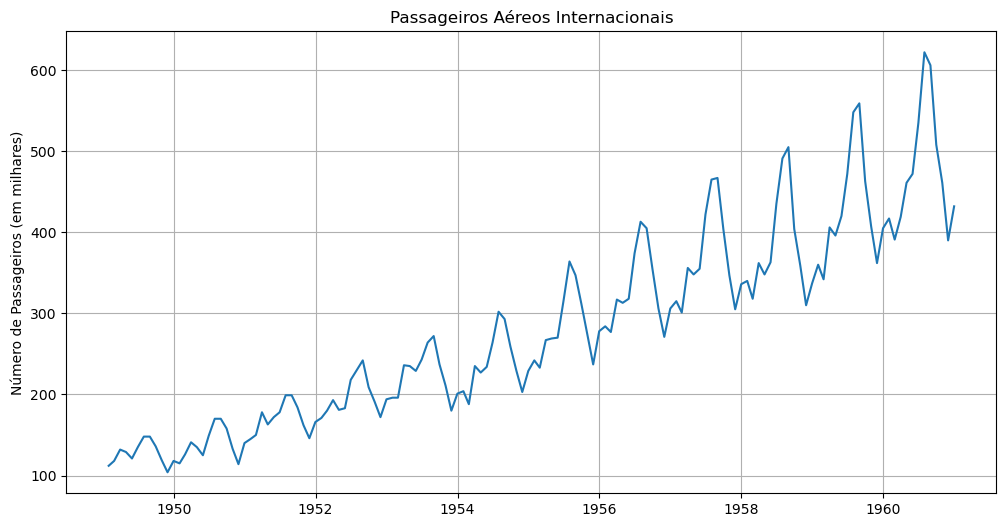

In [3]:
# Plotar série original
plt.figure(figsize=(12, 6))
plt.plot(airpassengers)
plt.title('Passageiros Aéreos Internacionais')
plt.ylabel('Número de Passageiros (em milhares)')
plt.grid(True)
plt.show()


In [4]:
# STL Forecast
stl_forecast = STLForecast(
    airpassengers,
    ARIMA,  # Modelo usado para a componente não-sazonal
    model_kwargs={'order': (1, 1, 1)},  # Parâmetros do ARIMA
    period=12  # Sazonalidade anual
).fit()

In [5]:
# Previsão para 48 meses (4 anos)
forecast = stl_forecast.forecast(48)
print("Previsão STL:\n", forecast)

Previsão STL:
 1961-01-31    449.666619
1961-02-28    421.701467
1961-03-31    460.022515
1961-04-30    477.556929
1961-05-31    491.622914
1961-06-30    549.197132
1961-07-31    631.101081
1961-08-31    625.042749
1961-09-30    514.962927
1961-10-31    461.040473
1961-11-30    393.793215
1961-12-31    431.139527
1962-01-31    450.136329
1962-02-28    421.445064
1962-03-31    460.162479
1962-04-30    477.480527
1962-05-31    491.664620
1962-06-30    549.174365
1962-07-31    631.113508
1962-08-31    625.035965
1962-09-30    514.966630
1962-10-31    461.038452
1962-11-30    393.794318
1962-12-31    431.138925
1963-01-31    450.136658
1963-02-28    421.444885
1963-03-31    460.162577
1963-04-30    477.480473
1963-05-31    491.664649
1963-06-30    549.174349
1963-07-31    631.113517
1963-08-31    625.035961
1963-09-30    514.966632
1963-10-31    461.038451
1963-11-30    393.794319
1963-12-31    431.138924
1964-01-31    450.136658
1964-02-29    421.444885
1964-03-31    460.162577
1964-04-30

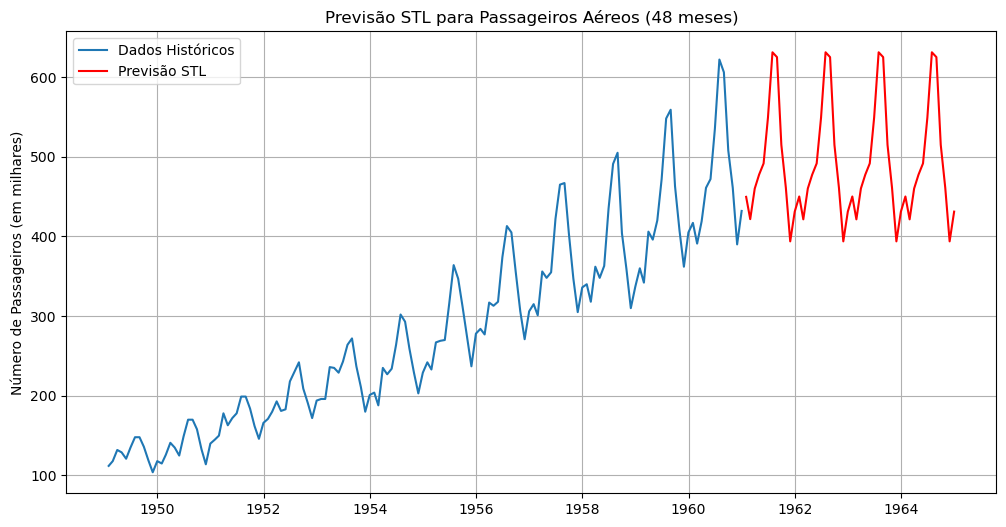

In [6]:
# Plotar resultado
plt.figure(figsize=(12, 6))
plt.plot(airpassengers, label='Dados Históricos')
plt.plot(forecast, label='Previsão STL', color='red')
plt.title('Previsão STL para Passageiros Aéreos (48 meses)')
plt.ylabel('Número de Passageiros (em milhares)')
plt.legend()
plt.grid(True)
plt.show()


## Exponential smoothing

In [7]:
# Bibliotecas
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset
import pandas as pd

In [ ]:
## Carregar os datasets (equivalentes aos do R)
austres = get_rdataset('austres').data['value']
austres_dates = pd.date_range(start='1971-03-31', periods=len(austres), freq='QE')
austres_ts = pd.Series(austres.values, index=austres_dates)

jj = get_rdataset('JohnsonJohnson').data['value']
jj_dates = pd.date_range(start='1960-01-01', periods=len(jj), freq='QE')
jj_ts = pd.Series(jj.values, index=jj_dates)

In [10]:
## Função para plotar similar ao autoplot
def autoplot(series, forecast=None, title=''):
    plt.figure(figsize=(10, 5))
    plt.plot(series, label='Dados históricos')
    if forecast is not None:
        plt.plot(forecast, label='Previsão', color='red')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


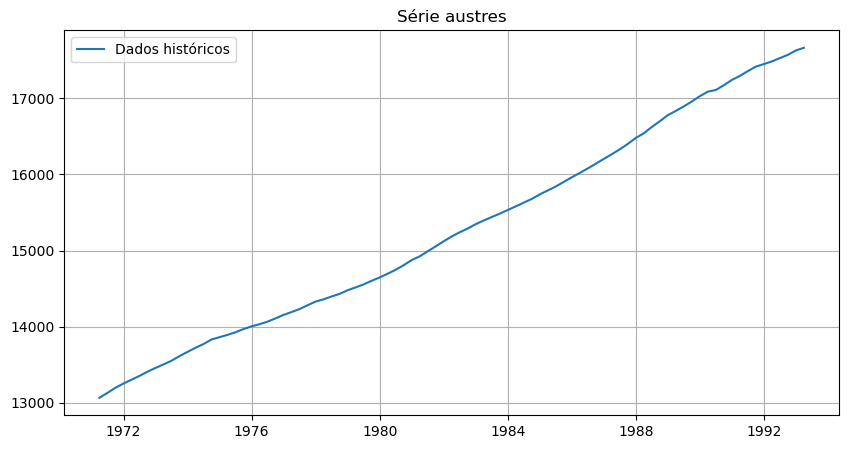

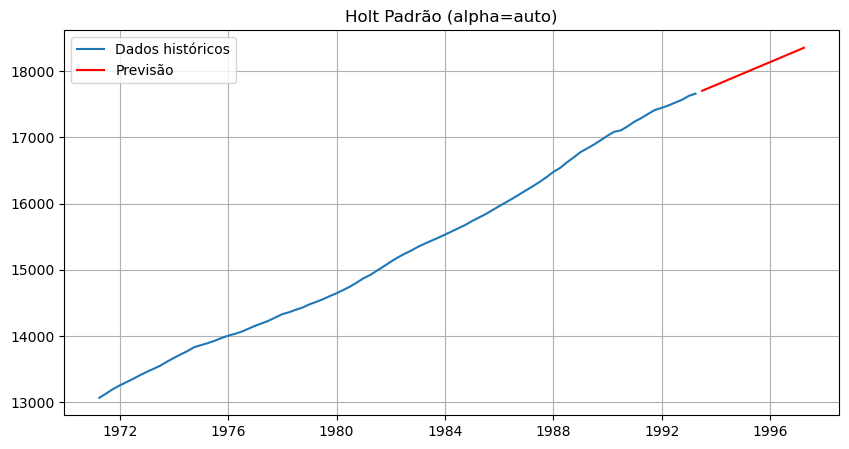

In [11]:
# Modelo 1: Holt padrão
autoplot(austres_ts, title='Série austres')
mdl1 = ExponentialSmoothing(austres_ts, trend='add', damped_trend=False).fit()
forecast1 = mdl1.forecast(16)
autoplot(austres_ts, forecast1, 'Holt Padrão (alpha=auto)')


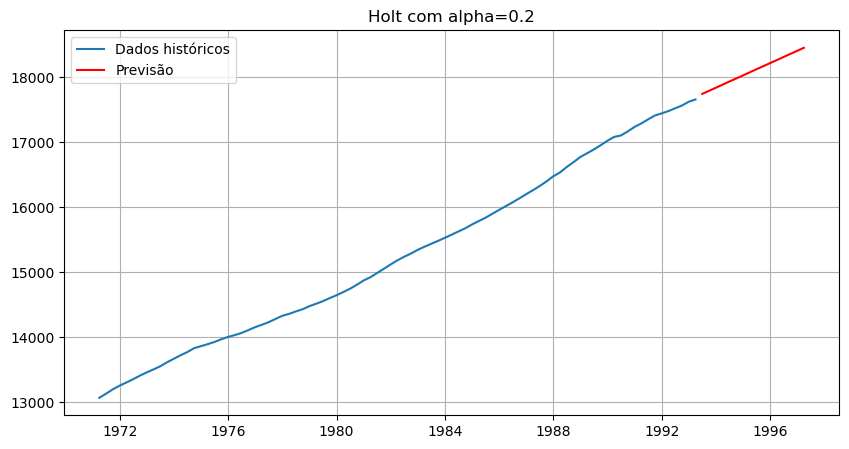

In [12]:
# Modelo 2: Holt com alpha=0.2
mdl2 = ExponentialSmoothing(austres_ts, trend='add',
                            damped_trend=False).fit(smoothing_level=0.2)
forecast2 = mdl2.forecast(16)
autoplot(austres_ts, forecast2, 'Holt com alpha=0.2')


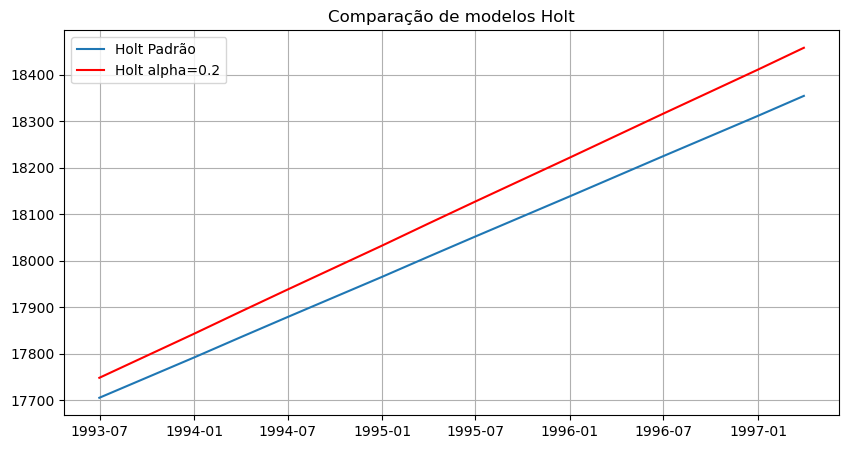

In [13]:
# Comparação dos dois modelos
plt.figure(figsize=(10, 5))
plt.plot(forecast1, label='Holt Padrão')
plt.plot(forecast2, label='Holt alpha=0.2', color='red')
plt.title('Comparação de modelos Holt')
plt.legend()
plt.grid(True)
plt.show()


## Holt Winters - Seasonal

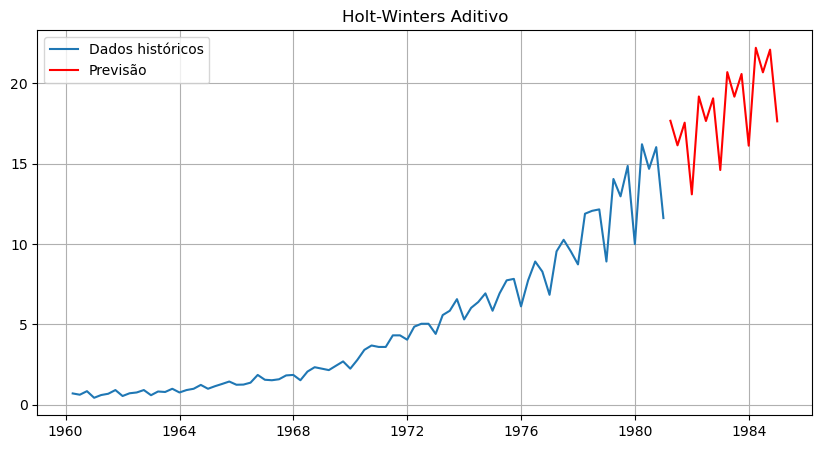

Previsão Aditiva:
 1981-03-31    17.657190
1981-06-30    16.130915
1981-09-30    17.540691
1981-12-31    13.084318
1982-03-31    19.169792
1982-06-30    17.643516
1982-09-30    19.053292
1982-12-31    14.596920
1983-03-31    20.682393
1983-06-30    19.156118
1983-09-30    20.565894
1983-12-31    16.109521
1984-03-31    22.194995
1984-06-30    20.668719
1984-09-30    22.078495
1984-12-31    17.622122
Freq: QE-DEC, dtype: float64


In [14]:
# Modelo 5: Aditivo
mdl5 = ExponentialSmoothing(jj_ts, trend='add', seasonal='add', seasonal_periods=4).fit()
forecast5 = mdl5.forecast(16)
autoplot(jj_ts, forecast5, 'Holt-Winters Aditivo')
print("Previsão Aditiva:\n", forecast5)


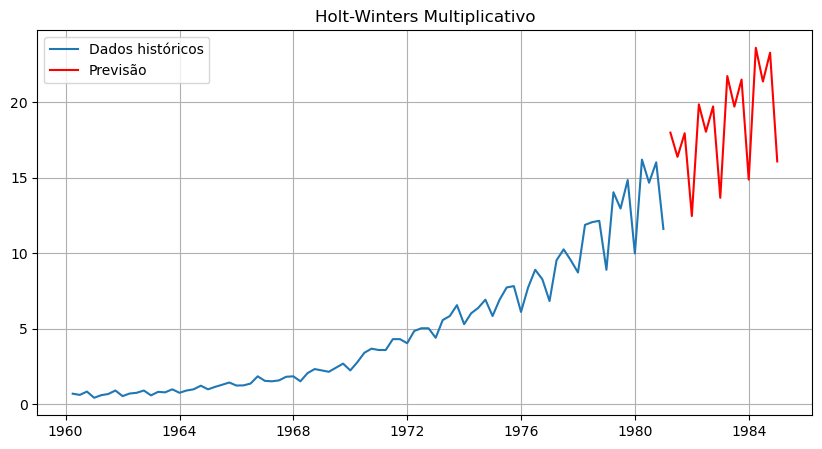


Previsão Multiplicativa:
 1981-03-31    17.982665
1981-06-30    16.380991
1981-09-30    17.944925
1981-12-31    12.467674
1982-03-31    19.854923
1982-06-30    18.043226
1982-09-30    19.720807
1982-12-31    13.671722
1983-03-31    21.727182
1983-06-30    19.705461
1983-09-30    21.496688
1983-12-31    14.875770
1984-03-31    23.599440
1984-06-30    21.367696
1984-09-30    23.272570
1984-12-31    16.079818
Freq: QE-DEC, dtype: float64


In [15]:
# Modelo 6: Multiplicativo
mdl6 = ExponentialSmoothing(jj_ts, trend='add', seasonal='mul', seasonal_periods=4).fit()
forecast6 = mdl6.forecast(16)
autoplot(jj_ts, forecast6, 'Holt-Winters Multiplicativo')
print("\nPrevisão Multiplicativa:\n", forecast6)


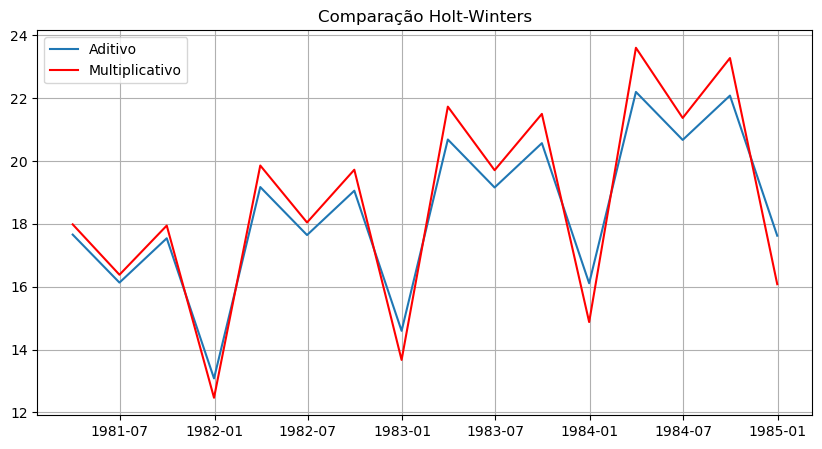

In [16]:
# Comparação
plt.figure(figsize=(10, 5))
plt.plot(forecast5, label='Aditivo')
plt.plot(forecast6, label='Multiplicativo', color='red')
plt.title('Comparação Holt-Winters')
plt.legend()
plt.grid(True)
plt.show()


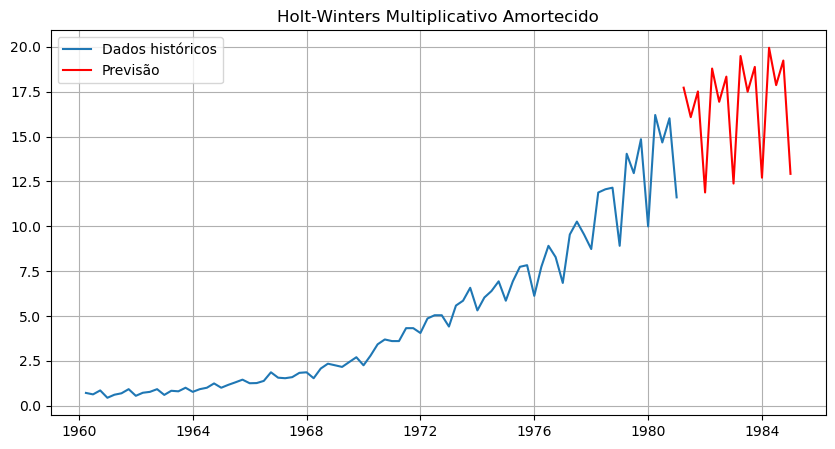

In [17]:
# Modelo 7: Multiplicativo Amortecido
mdl7 = ExponentialSmoothing(
    jj_ts, trend='add', seasonal='mul',
    damped_trend=True, seasonal_periods=4
).fit(damping_trend=0.9)

forecast7 = mdl7.forecast(16)
autoplot(jj_ts, forecast7, 'Holt-Winters Multiplicativo Amortecido')

## ETS

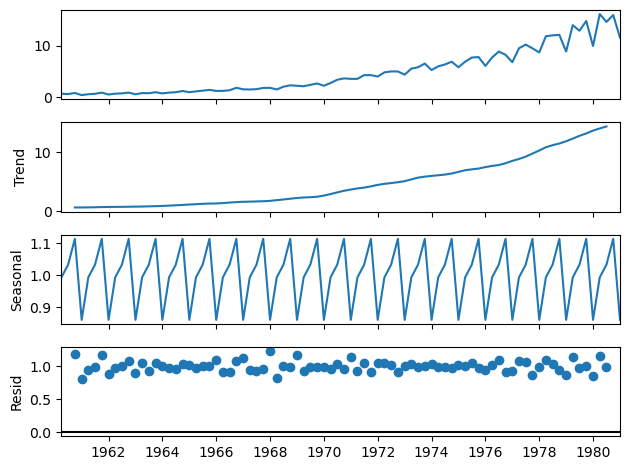

In [18]:
# Decomposição
decomp = seasonal_decompose(jj_ts, model='multiplicative')
decomp.plot()
plt.show()


In [19]:
# Modelo 8: ETS automático
mdl8 = ExponentialSmoothing(jj_ts, trend='add', seasonal='mul', seasonal_periods=4).fit()
print("\nModelo ETS Automático:")
print(f"SSE: {mdl8.sse:.2f}")
print(f"Parâmetros: {mdl8.params}")



Modelo ETS Automático:
SSE: 15.04
Parâmetros: {'smoothing_level': np.float64(0.22118866892736638), 'smoothing_trend': np.float64(0.22118866892736638), 'smoothing_seasonal': np.float64(0.6793588634022855), 'damping_trend': nan, 'initial_level': np.float64(0.6525478381163916), 'initial_trend': np.float64(0.009210588789758887), 'initial_seasons': array([1.05163063, 0.97577952, 1.28106821, 0.68305073]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


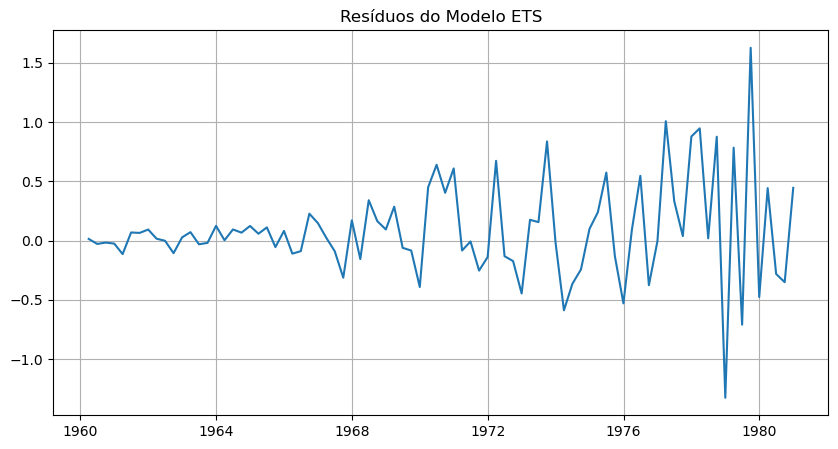

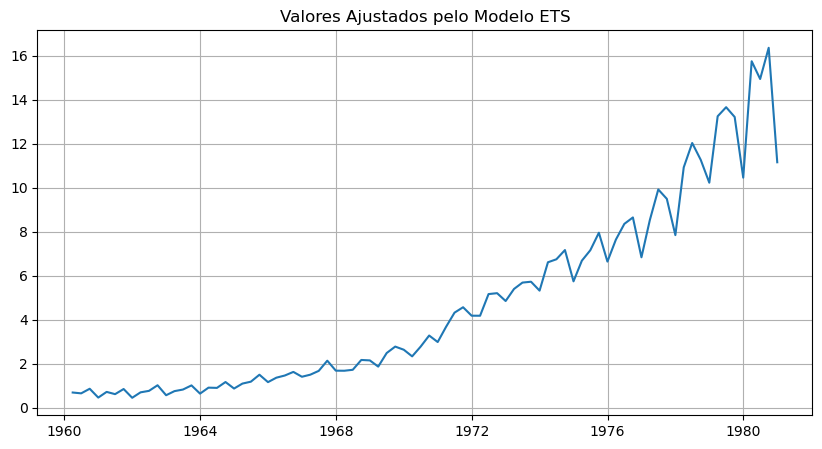

In [20]:
# Resíduos e ajustados
plt.figure(figsize=(10, 5))
plt.plot(mdl8.resid)
plt.title('Resíduos do Modelo ETS')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(mdl8.fittedvalues)
plt.title('Valores Ajustados pelo Modelo ETS')
plt.grid(True)
plt.show()


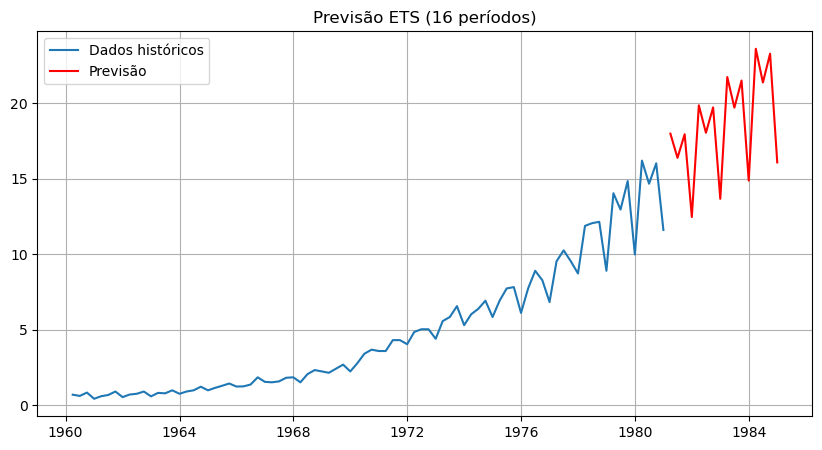

In [21]:
# Previsão com intervalos
forecast8 = mdl8.forecast(16)
autoplot(jj_ts, forecast8, 'Previsão ETS (16 períodos)')


In [22]:
# Modelo 9: ETS ZAA amortecido (equivalente)
mdl9 = ExponentialSmoothing(jj_ts, trend='add', seasonal='add',
                            damped_trend=True, seasonal_periods=4).fit()

print("\nModelo ETS ZAA Amortecido:")
print(f"SSE: {mdl9.sse:.2f}")



Modelo ETS ZAA Amortecido:
SSE: 16.82


In [23]:
# Modelo 10: ETS ZZZ amortecido (equivalente)
mdl10 = ExponentialSmoothing(jj_ts, trend=None, seasonal=None,
                             damped_trend=True, seasonal_periods=4).fit()

print("\nModelo ETS ZZZ Amortecido:")
print(f"SSE: {mdl10.sse:.2f}")


ValueError: Can only dampen the trend component

## Auto Arima

In [27]:
# Bibliotecas
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import statsmodels.api as sm
import pandas as pd


In [28]:
# Carregar dados co2 (mesmo dataset do R)
co2_data = sm.datasets.co2.load_pandas()
co2 = co2_data.data['co2']
co2 = co2.dropna()
co2.index = pd.date_range(start='1959-01', periods=len(co2), freq='ME')


In [29]:
# 1. Modelo auto.arima padrão (com trace)
print("Ajustando modelo 1 (stepwise)...")

modelo1 = auto_arima(
    co2, trace=True, seasonal=True, m=12,
    stepwise=True, approximation=True, suppress_warnings=True
)

print("\nModelo 1 (stepwise):")
print(modelo1.summary())


Ajustando modelo 1 (stepwise)...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2817.963, Time=3.85 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3253.340, Time=0.13 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3237.784, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3239.943, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3256.802, Time=0.06 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2816.431, Time=3.36 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2813.699, Time=0.92 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2815.689, Time=3.29 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2908.229, Time=0.63 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=2978.052, Time=0.37 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=2801.226, Time=1.14 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=2802.105, Time=4.34 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=2801.895, Time=4.17 sec
 ARIMA(3,1,2)(1,0,1)[12] intercept   : AIC=2803.720, 

In [30]:
# 2. Modelo auto.arima completo (sem stepwise)
print("\nAjustando modelo 2 (busca completa)...")

modelo2 = auto_arima(
    co2, trace=True, seasonal=True, m=12,
    stepwise=False, approximation=False, suppress_warnings=True
)

print("\nModelo 2 (busca completa):")
print(modelo2.summary())



Ajustando modelo 2 (busca completa)...
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3253.340, Time=0.08 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=3248.661, Time=0.33 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3211.469, Time=1.23 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=3250.769, Time=0.31 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=3233.664, Time=0.84 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3212.515, Time=1.94 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=3199.965, Time=1.17 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=3195.790, Time=1.91 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=5.39 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3242.541, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3239.943, Time=0.52 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3209.797, Time=1.98 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=3241.221, Time=0.51 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=3229.140, Time=1.22 sec
 ARIMA(0,1,1)(1,0,2)[12] in

In [31]:
# Previsões
prev1 = modelo1.predict(n_periods=12)
prev2 = modelo2.predict(n_periods=12)


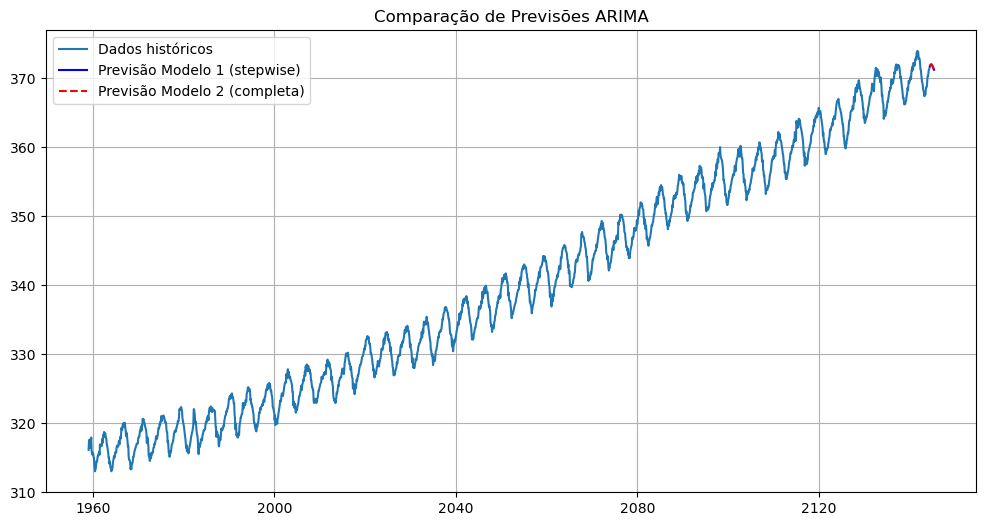

In [32]:
# Plotar previsões
plt.figure(figsize=(12, 6))
plt.plot(co2, label='Dados históricos')
plt.plot(prev1, label='Previsão Modelo 1 (stepwise)', color='blue')
plt.plot(prev2, label='Previsão Modelo 2 (completa)', color='red', linestyle='--')
plt.title('Comparação de Previsões ARIMA')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
# Imprimir valores das previsões
print("\nPrevisão Modelo 1 (stepwise):")
print(prev1)

print("\nPrevisão Modelo 2 (busca completa):")
print(prev2)



Previsão Modelo 1 (stepwise):
2144-06-30    371.759841
2144-07-31    371.890632
2144-08-31    371.961512
2144-09-30    372.006149
2144-10-31    372.000304
2144-11-30    371.936269
2144-12-31    371.847275
2145-01-31    371.746530
2145-02-28    371.617763
2145-03-31    371.481618
2145-04-30    371.349396
2145-05-31    371.218750
Freq: ME, dtype: float64

Previsão Modelo 2 (busca completa):
2144-06-30    371.730328
2144-07-31    371.871292
2144-08-31    371.954029
2144-09-30    371.983043
2144-10-31    371.964647
2144-11-30    371.906469
2144-12-31    371.816958
2145-01-31    371.704920
2145-02-28    371.579085
2145-03-31    371.447738
2145-04-30    371.318406
2145-05-31    371.197625
Freq: ME, dtype: float64
